## EMAIL SPAM DETECTOR
## Vidul Garg

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing conte.nt

In [42]:
# Importing all necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [43]:
df=pd.read_csv(r"D:\MachineLearning\OasisInternship\Task 4 (EMail Spam Detector)\spam.csv", encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [44]:
df=df.drop(columns="Unnamed: 2")
df=df.drop(columns="Unnamed: 3")
df=df.drop(columns="Unnamed: 4")
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [45]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

## Data Visualization

<Axes: xlabel='v1', ylabel='count'>

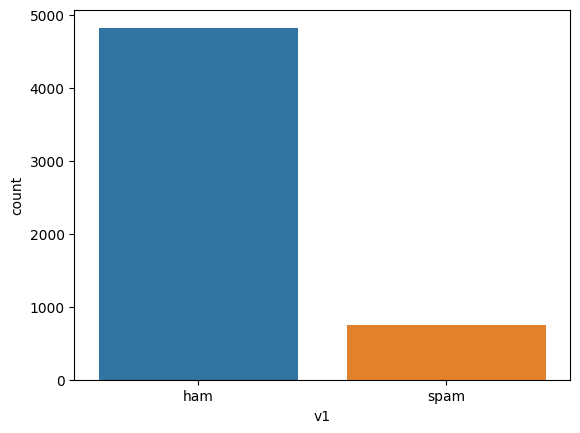

In [46]:
sns.countplot(data=df, x='v1')

<Axes: ylabel='count'>

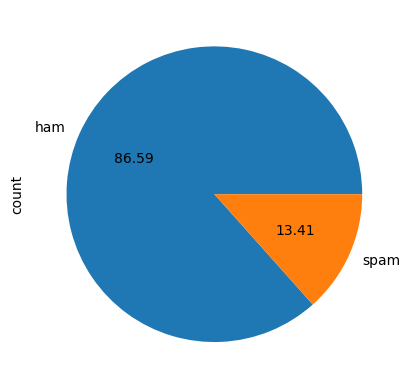

In [47]:
df["v1"].value_counts().plot(kind='pie',autopct='%.2f')

## Encoding

In [48]:
df["label"]=df["v1"].replace({"ham":0,"spam":1})
df

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [49]:
df["v2"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
nlp=spacy.load("en_core_web_sm")

## Preprocessing (removing stop words and doing lemmatization) 

In [51]:
def preprocess (text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [52]:
df["message"]=df['v2'].apply(lambda x : preprocess(x))

In [53]:
df

,v1,v2,label,message
0,ham,"Go until jurong point, crazy.. Available only ...",0,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf live
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,2nd time try 2 contact u. U win å£750 Pound pr...
5568,ham,Will Ì_ b going to esplanade fr home?,0,Ì b go esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,0,guy bitching act like interested buy week give...


In [54]:
preprocess("Thor ate pizza")

'thor eat pizza'

## Train_Test_Split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(df.message, df.label, test_size=0.2, random_state=2022)

In [56]:
print(x_train.shape)
print(x_test.shape)

(4457,)
(1115,)


In [57]:
x_train

4422           alright thank advice enjoy night try sleep
5398                          hi hope good day well night
4880                                                 pick
3499    Dorothy@kiefer.com Bank Granite issue Strong B...
4314                                         captain room
                              ...                        
5047              yeah basically time week away mom amp 3
4720                                 yup lor u dun wan ok
173     Bloody hell not believe forget surname Mr Ill ...
1244                                     go 4 dinner soon
4989    Phony å£350 award Todays Voda number end XXXX ...
Name: message, Length: 4457, dtype: object

## Text Vectorization and model training:

## Naive_Bayes

In [58]:
model1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])
model1

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('Multi NB', MultinomialNB())])

In [59]:
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       977
           1       0.99      0.80      0.88       138

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [60]:
v = model1.named_steps['vectorizer_tfidf']
vocabulary = v.get_feature_names_out()
for word in vocabulary:
    index=v.vocabulary_.get(word)
    idf_score=v.idf_[index]
    print(f"{word} : {idf_score}")

00 : 7.004560241147444
000 : 6.183579689077614
000pes : 8.70930833338587
008704050406 : 8.303843225277705
0089 : 8.70930833338587
0121 : 8.70930833338587
01223585236 : 8.70930833338587
01223585334 : 8.70930833338587
0125698789 : 8.70930833338587
02 : 7.456545364890501
0207 : 8.303843225277705
02072069400 : 8.70930833338587
02073162414 : 8.70930833338587
021 : 8.303843225277705
03 : 6.917548864157814
04 : 7.004560241147444
0430 : 8.70930833338587
05 : 8.016161152825923
050703 : 8.303843225277705
0578 : 8.70930833338587
06 : 7.323013972265978
07 : 8.303843225277705
07008009200 : 8.70930833338587
07046744435 : 8.70930833338587
07090201529 : 8.70930833338587
07090298926 : 8.70930833338587
07099833605 : 8.70930833338587
07123456789 : 8.303843225277705
0721072 : 8.70930833338587
07732584351 : 8.70930833338587
07734396839 : 8.303843225277705
07742676969 : 8.303843225277705
07753741225 : 8.70930833338587
0776xxxxxxx : 8.303843225277705
07781482378 : 8.303843225277705
07786200117 : 8.3038432252

In [61]:
y_pred1

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [62]:
model1.predict(["Congratulations! You've won a free vacation to an exotic island. Claim your prize now by clicking on the link below: [link]"])

array([1], dtype=int64)

## KNN Classifier

In [63]:
model2 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])
model2

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])

In [64]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       977
           1       1.00      0.37      0.54       138

    accuracy                           0.92      1115
   macro avg       0.96      0.68      0.75      1115
weighted avg       0.93      0.92      0.91      1115



## RandomForestClassifier

In [65]:
model3 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),       
     ('Random Forest', RandomForestClassifier())         
])
model3

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('Random Forest', RandomForestClassifier())])

In [66]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       977
           1       1.00      0.86      0.93       138

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## We can see that Random Forest Classifier gives more accuracy and less error than other models !!

## Predicting 

In [69]:
Mails=["Don't forget to bring your ID and passport for your flight tomorrow.",
       "You've been selected for a special offer. Click to receive a $1,000 gift card. Claim",
       "You are a winner U have been specially selected 2 receive å£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+) ",
       "Hi John, just checking in to see if you received my email from yesterday.",
       "Congratulations! You've won a free iPhone. Click here to claim your prize now!"
      ]
for i in Mails:
    x=model3.predict([i])
    if(x==0):
        print("NonSpam Mail")
    elif(x==1):
        print("Spam Mail")

# Spam---> 1
# Non Spam --->0

NonSpam Mail
Spam Mail
Spam Mail
NonSpam Mail
Spam Mail
